## Explore and process ERA5

In [1]:
import xarray as xr

In [2]:
filepath = "/Users/lb962/Downloads/ESL/GESLA/data/ERA5hourly/ERA52014.nc"
era5_2014 = xr.open_dataset(filepath)

In [3]:
import os
import xarray as xr

# Define the path to the folder containing the NetCDF files
folder_path = '/Users/lb962/Downloads/ESL/GESLA/data/ERA5hourly'

# Get a list of all NetCDF files in the folder
nc_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.nc')]

# Open all NetCDF files as a single xarray Dataset
ERA5_dataset = xr.open_mfdataset(nc_files)

In [4]:
era5_2014 

<xarray.Dataset>
Dimensions:    (longitude: 107, latitude: 73, time: 8760)
Coordinates:
  * longitude  (longitude) float32 -11.5 -11.25 -11.0 -10.75 ... 14.5 14.75 15.0
  * latitude   (latitude) float32 66.0 65.75 65.5 65.25 ... 48.5 48.25 48.0
  * time       (time) datetime64[ns] 2014-01-01 ... 2014-12-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    mdts       (time, latitude, longitude) float32 ...
    mpts       (time, latitude, longitude) float32 ...
    mwd        (time, latitude, longitude) float32 ...
    mwp        (time, latitude, longitude) float32 ...
    sst        (time, latitude, longitude) float32 ...
    shts       (time, latitude, longitude) float32 ...
    shww       (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-02-27 01:26:39 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [6]:
era5_2014_df = era5_2014.to_dataframe().reset_index().dropna()

In [13]:
era5_2014

<xarray.Dataset>
Dimensions:    (longitude: 107, latitude: 73, time: 8760)
Coordinates:
  * longitude  (longitude) float32 -11.5 -11.25 -11.0 -10.75 ... 14.5 14.75 15.0
  * latitude   (latitude) float32 66.0 65.75 65.5 65.25 ... 48.5 48.25 48.0
  * time       (time) datetime64[ns] 2014-01-01 ... 2014-12-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 -9.633 -9.674 ... 1.226 1.662
    v10        (time, latitude, longitude) float32 -7.494 -7.447 ... 1.467 1.48
    mdts       (time, latitude, longitude) float32 155.0 156.7 158.3 ... nan nan
    mpts       (time, latitude, longitude) float32 10.97 11.01 11.05 ... nan nan
    mwd        (time, latitude, longitude) float32 79.18 80.83 82.29 ... nan nan
    mwp        (time, latitude, longitude) float32 9.099 9.208 9.304 ... nan nan
    sst        (time, latitude, longitude) float32 276.5 276.4 276.2 ... nan nan
    shts       (time, latitude, longitude) float32 2.765 2.854 2.93 ... nan nan
    shww       (time, latitude, longitude) float32 2.401 2.363 2.331 ... nan nan
    sp         (time, latitude, longitude) float32 9.981e+04 ... 9.573e+04
Attributes:
    Conventions:  CF-1.6
    history:      2024-02-27 01:26:39 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

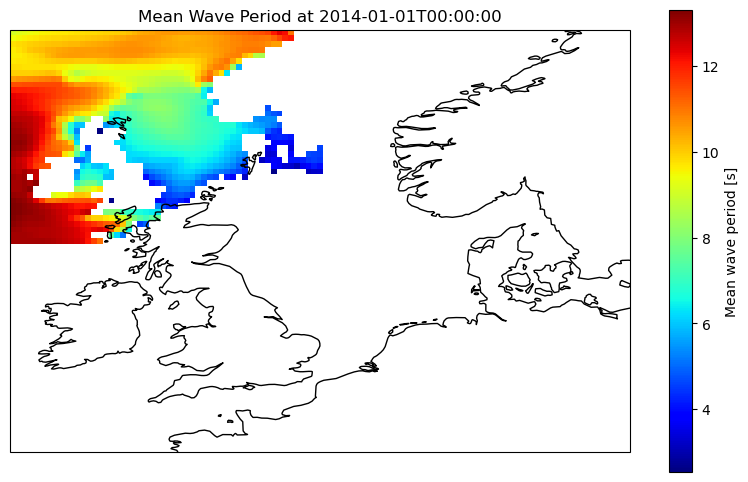

In [20]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Specify the point in time you're interested in
specific_time = '2014-01-01T00:00:00'  # Example: January 1st, 2014, 12:00 PM

# Find the indices corresponding to the specific time
#time_index = era5_2014.time.values.tolist().index(specific_time)

# Extract Mean Wave Period (MWP) data at the specific time
mwp_data = era5_2014.mwp.sel(time=specific_time)

# Plot MWP using Cartopy
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Plot MWP data
mwp_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='jet')

# Add title and labels
plt.title(f'Mean Wave Period at {specific_time}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


In [36]:
era5_2014

<xarray.Dataset>
Dimensions:    (longitude: 107, latitude: 73, time: 8760)
Coordinates:
  * longitude  (longitude) float32 -11.5 -11.25 -11.0 -10.75 ... 14.5 14.75 15.0
  * latitude   (latitude) float32 66.0 65.75 65.5 65.25 ... 48.5 48.25 48.0
  * time       (time) datetime64[ns] 2014-01-01 ... 2014-12-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 -9.633 -9.674 ... 1.226 1.662
    v10        (time, latitude, longitude) float32 -7.494 -7.447 ... 1.467 1.48
    mdts       (time, latitude, longitude) float32 155.0 156.7 158.3 ... nan nan
    mpts       (time, latitude, longitude) float32 10.97 11.01 11.05 ... nan nan
    mwd        (time, latitude, longitude) float32 79.18 80.83 82.29 ... nan nan
    mwp        (time, latitude, longitude) float32 9.099 9.208 9.304 ... nan nan
    sst        (time, latitude, longitude) float32 276.5 276.4 276.2 ... nan nan
    shts       (time, latitude, longitude) float32 2.765 2.854 2.93 ... nan nan
    shww       (time, latitude, longitude) float32 2.401 2.363 2.331 ... nan nan
    sp         (time, latitude, longitude) float32 9.981e+04 ... 9.573e+04
Attributes:
    Conventions:  CF-1.6
    history:      2024-02-27 01:26:39 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

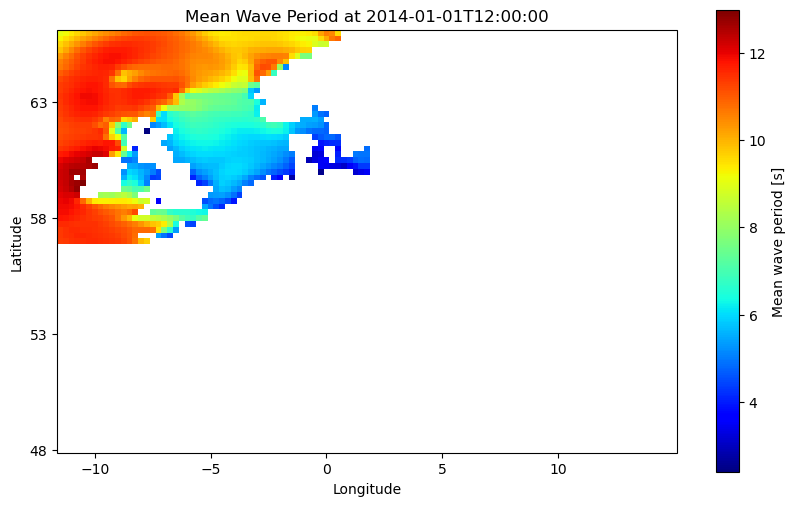

In [33]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# Specify the point in time you're interested in
specific_time = '2014-01-01T12:00:00'  # Example: January 1st, 2014, 12:00 PM

# Extract Mean Wave Period (MWP) data at the specific time
mwp_data = era5_2014.mwp.sel(time=specific_time)

# Plot MWP using Cartopy with coastlines
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot coastlines
# ax.coastlines()

# Plot MWP data
mwp_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='jet', x='longitude', y='latitude')

# Set latitude and longitude values as tick labels at 5-degree intervals
lat_ticks = np.arange(48, 65, 5)
lon_ticks = np.arange(-10, 15, 5)
ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())

# Add title and labels
plt.title(f'Mean Wave Period at {specific_time}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()



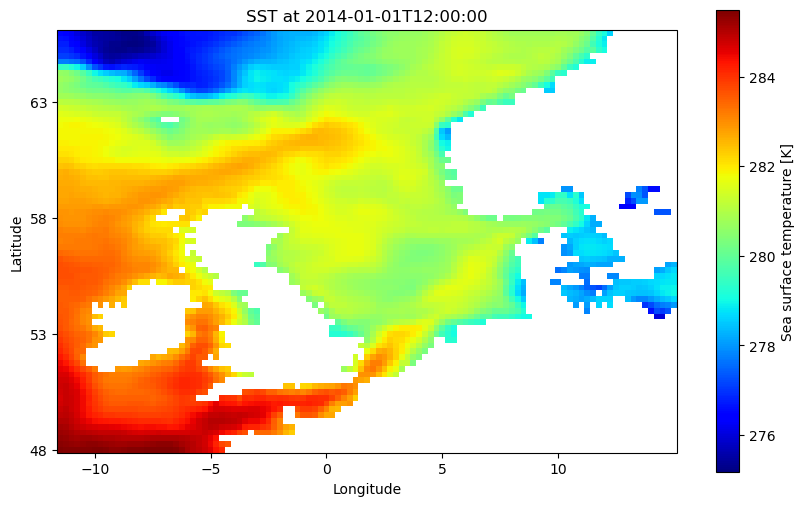

In [35]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# Specify the point in time you're interested in
specific_time = '2014-01-01T12:00:00'  # Example: January 1st, 2014, 12:00 PM

# Extract Mean Wave Period (MWP) data at the specific time
mwp_data = era5_2014.sst.sel(time=specific_time)

# Plot MWP using Cartopy with coastlines
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot coastlines
# ax.coastlines()

# Plot MWP data
mwp_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='jet', x='longitude', y='latitude')

# Set latitude and longitude values as tick labels at 5-degree intervals
lat_ticks = np.arange(48, 65, 5)
lon_ticks = np.arange(-10, 15, 5)
ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())

# Add title and labels
plt.title(f'SST at {specific_time}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()



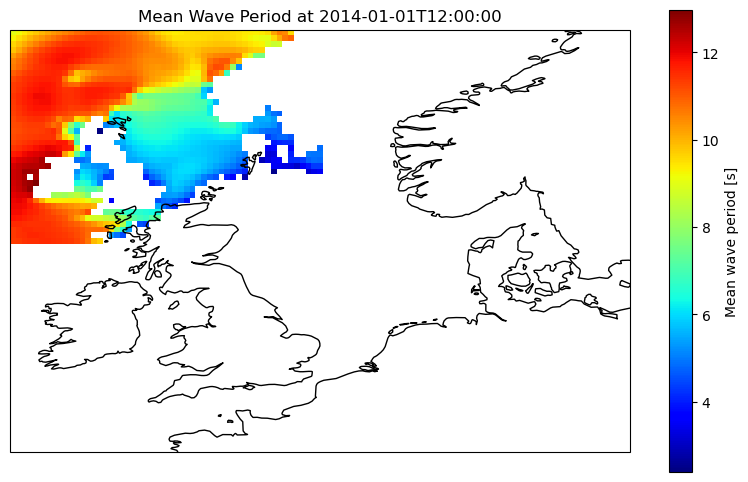

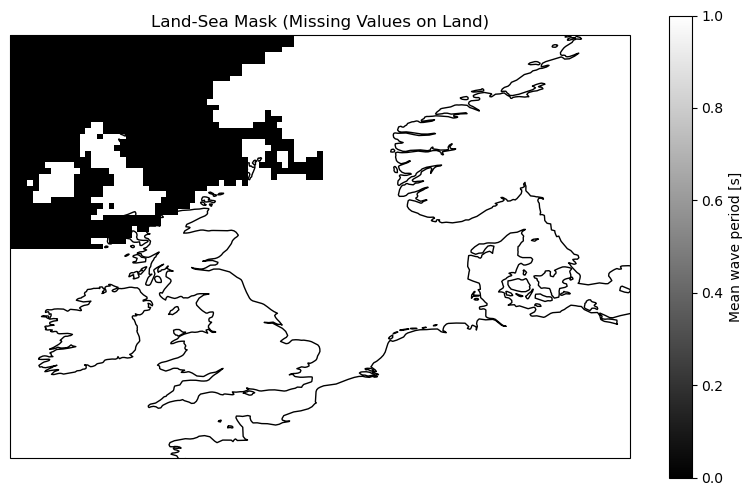

In [24]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# Specify the point in time you're interested in
specific_time = '2014-01-01T12:00:00'  # Example: January 1st, 2014, 12:00 PM

# Extract Mean Wave Period (MWP) data at the specific time
mwp_data = era5_2014.mwp.sel(time=specific_time)

# Plot MWP using Cartopy with coastlines
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot coastlines
ax.coastlines()

# Plot MWP data
mwp_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='jet', x='longitude', y='latitude')

# Add title and labels
plt.title(f'Mean Wave Period at {specific_time}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

# Check for missing values occurring on land
land_sea_mask = np.isnan(mwp_data)
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot land-sea mask
land_sea_mask.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='gray', x='longitude', y='latitude')

# Overlay coastlines
ax.coastlines()

# Add title and labels
plt.title('Land-Sea Mask (Missing Values on Land)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


In [7]:
era5_2014_df.columns

Index(['longitude', 'latitude', 'time', 'u10', 'v10', 'mdts', 'mpts', 'mwd',
       'mwp', 'sst', 'shts', 'shww', 'sp'],
      dtype='object')

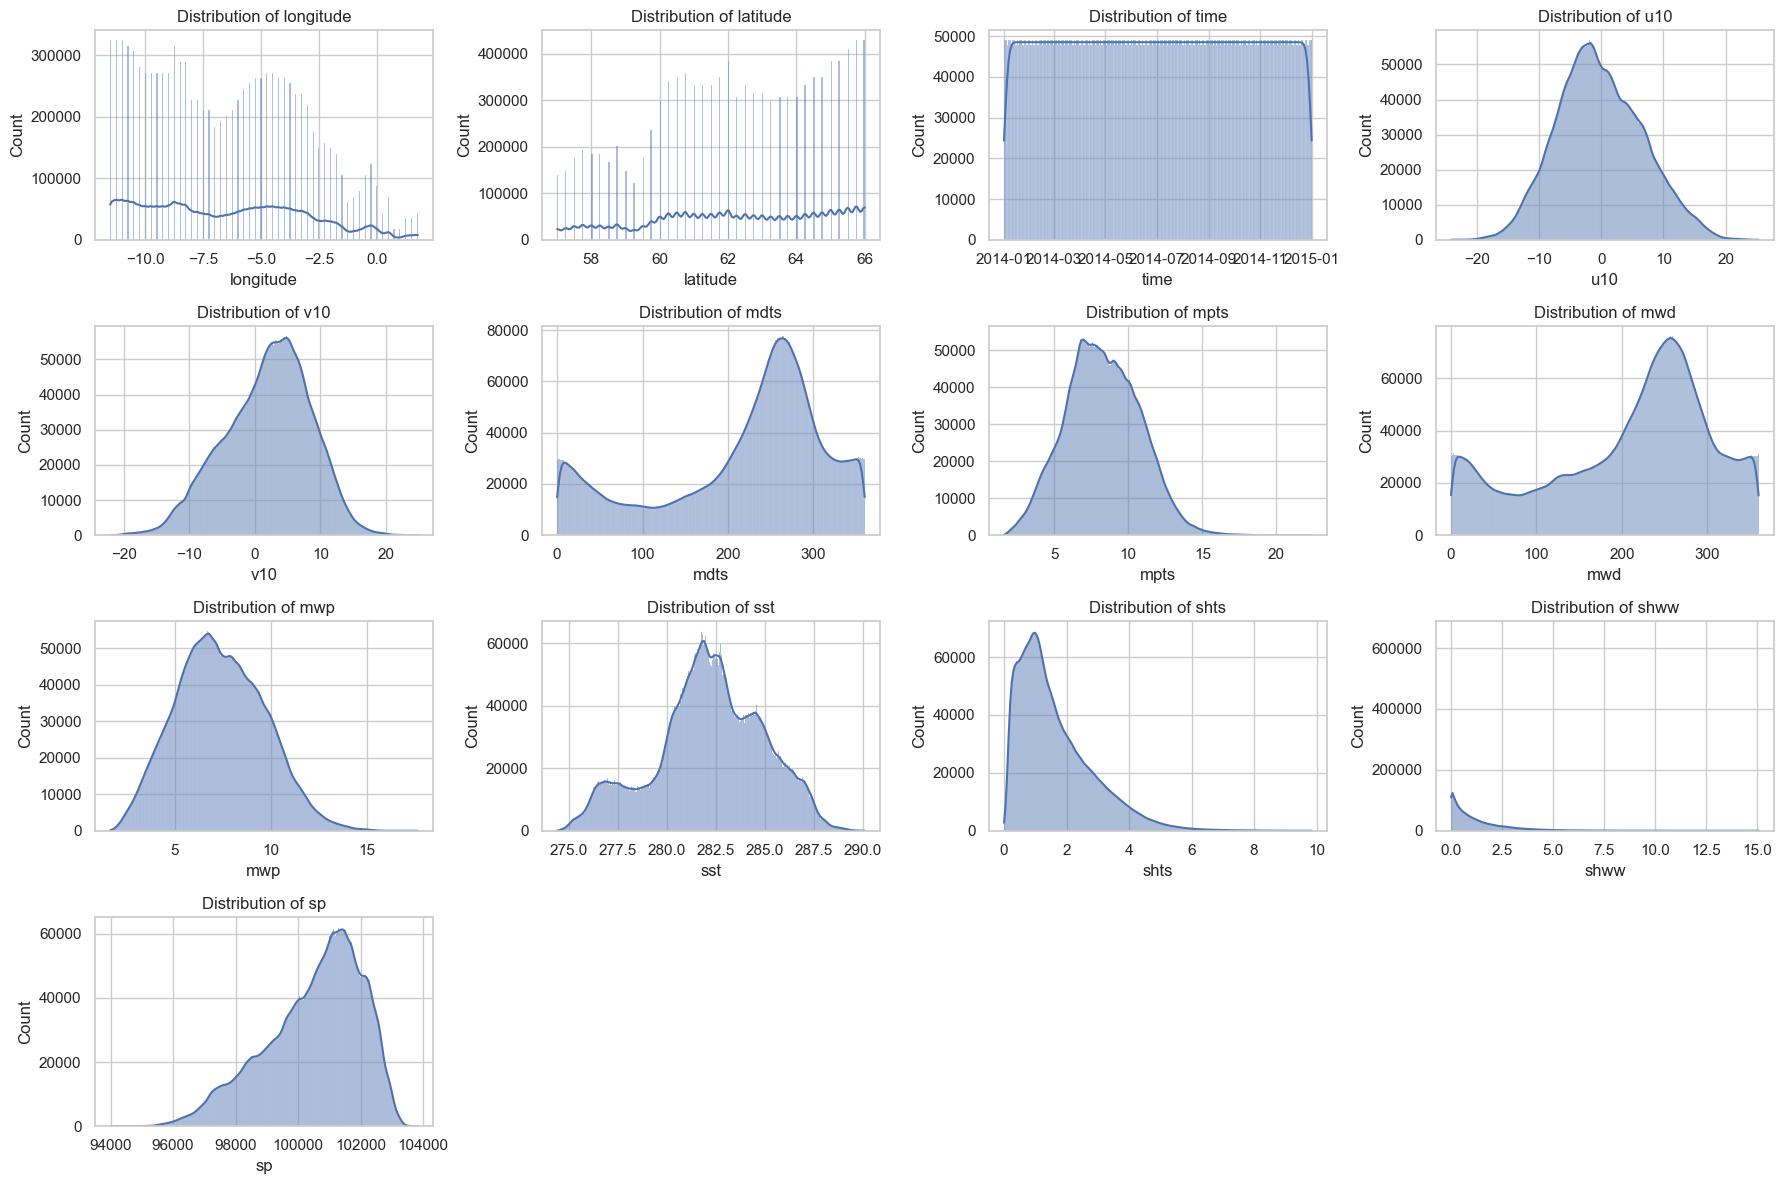

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions for each variable
sns.set(style="whitegrid")

# Plot distributions for each variable
plt.figure(figsize=(18, 12))

# Loop through each variable and plot its distribution
for i, column in enumerate(['longitude', 'latitude', 'time', 'u10', 'v10', 'mdts', 'mpts', 'mwd', 'mwp', 'sst', 'shts', 'shww', 'sp']):
    plt.subplot(4, 4, i + 1)
    sns.histplot(era5_2014_df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

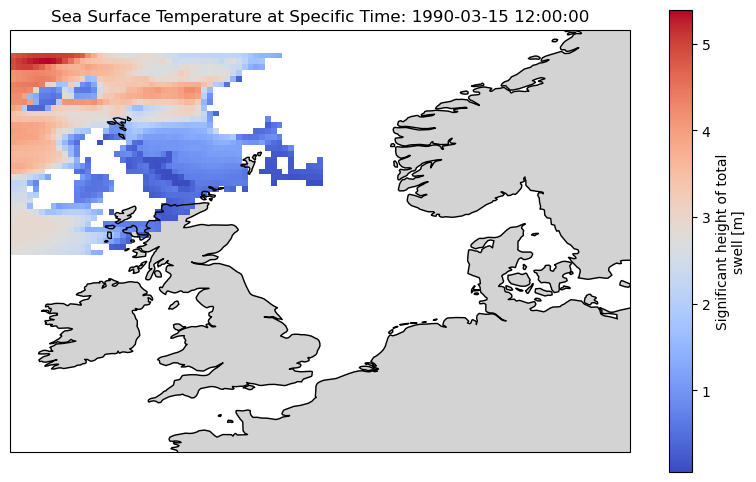

In [8]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Select the sea surface temperature (shts) at the specific time
specific_time_sst = ERA5_dataset.shts.sel(time='1990-03-15T12:00:00')

# Plotting the data
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot sea surface temperature
specific_time_sst.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')

# Add land feature
ax.add_feature(cfeature.LAND, color='lightgray')
# Add Cartopy coastline outline on top
ax.add_feature(cfeature.COASTLINE, edgecolor='black')

# Plot latitude and longitude
#plt.scatter(ERA5_dataset.longitude, ERA5_dataset.latitude, marker='.', color='red', transform=ccrs.PlateCarree())

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Sea Surface Temperature at Specific Time: 1990-03-15 12:00:00')
plt.grid(True)
plt.show()


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions for each variable
sns.set(style="whitegrid")

# Plot distributions for each variable
plt.figure(figsize=(18, 12))

# Loop through each variable and plot its distribution
for i, column in enumerate(['longitude', 'latitude', 'time', 'u10', 'v10', 'mdts', 'mpts', 'mwd', 'mwp', 'sst', 'shts', 'shww', 'sp']):
    plt.subplot(4, 4, i + 1)
    sns.histplot(ERA5_dataset[column].values.flatten(), kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# ALi autocorrelate

In [1]:
import xarray as xr
filepath = "/Users/lb962/Downloads/ESL/GESLA/data/ERA5hourly/ERA52014.nc"
era5_2014 = xr.open_dataset(filepath)

In [5]:
import os
import xarray as xr

# Directory containing the NetCDF files
directory = "/Users/lb962/Downloads/ESL/GESLA/data/ERA5hourly/"

# Get a list of all NetCDF files in the directory
nc_files = [file for file in os.listdir(directory) if file.endswith('.nc')]

# Open and merge all NetCDF files
merged_data = xr.open_mfdataset([os.path.join(directory, file) for file in nc_files], combine='by_coords')

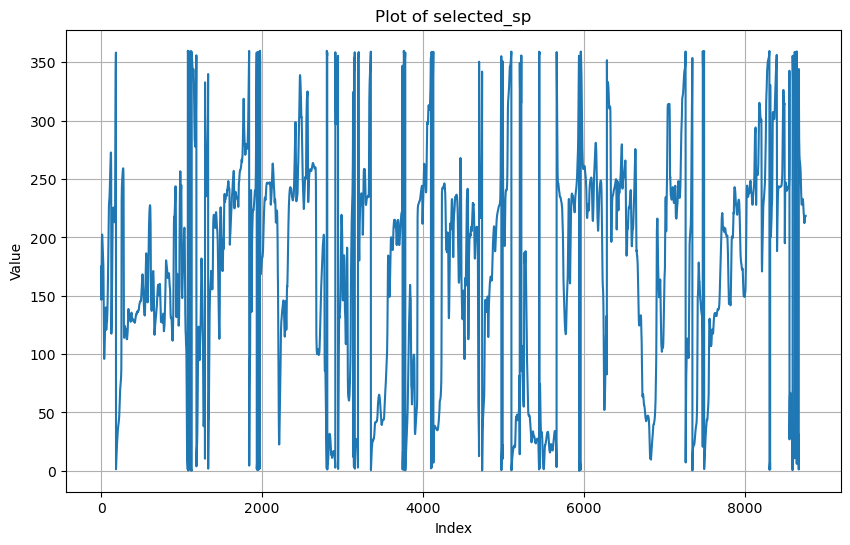

In [46]:
# Assuming era5_2014 is an xarray Dataset
selected_sp = era5_2014['mwd'].sel(longitude=-9, latitude=65, method='nearest')

import matplotlib.pyplot as plt

# Plot the selected_sp variable
plt.figure(figsize=(10, 6))
plt.plot(selected_sp)
plt.title('Plot of selected_sp')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [7]:
# Compute autocorrelation using NumPy
import numpy as np
autocorr = np.correlate(selected_sp, selected_sp, mode='full')

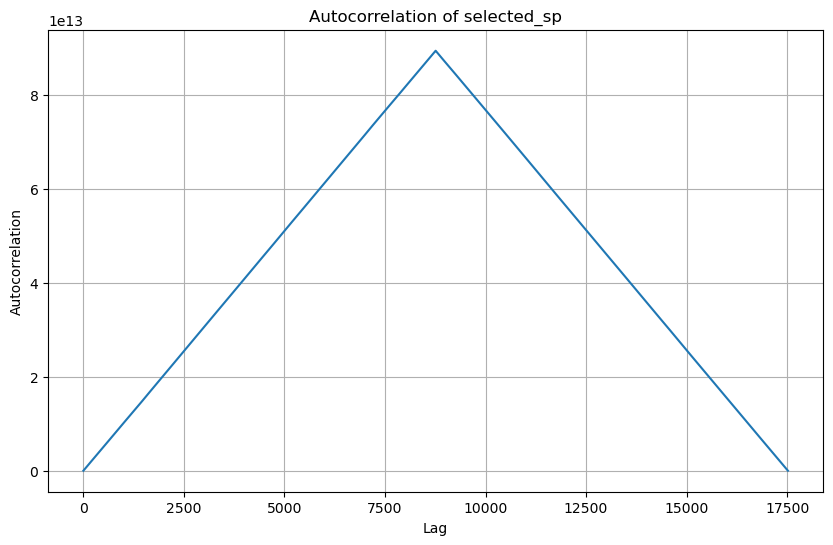

In [8]:
# Plot autocorrelation
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(autocorr)
plt.title('Autocorrelation of selected_sp')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

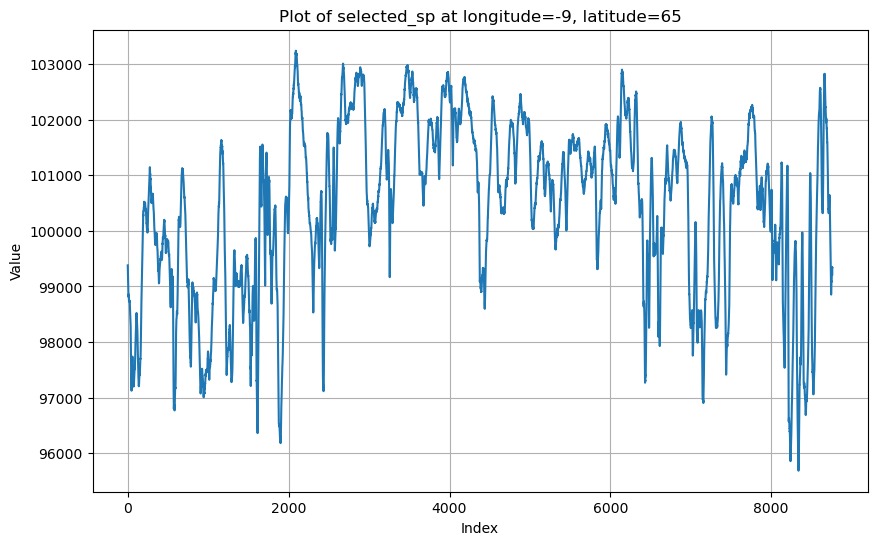

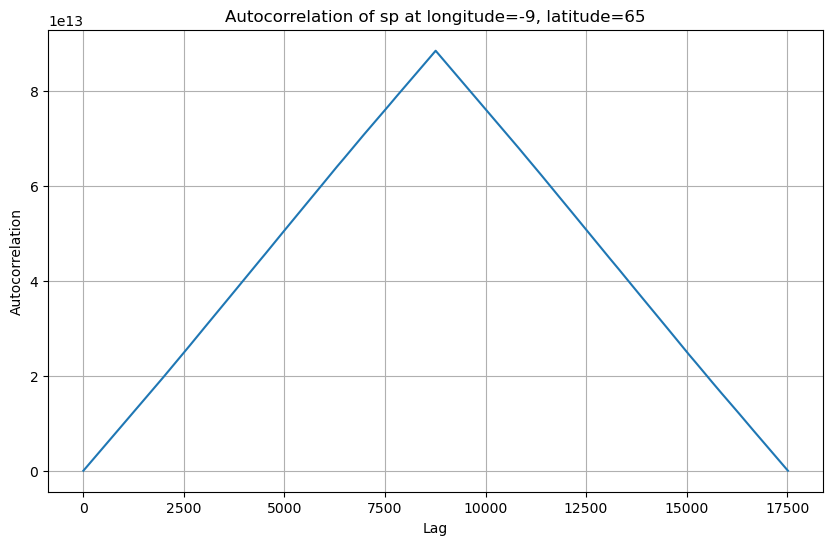

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def plot_autocorrelation(era5_data, variable, lon, lat):
    # Select the sp variable based on the nearest longitude and latitude
    selected_sp = era5_data[variable].sel(longitude=lon, latitude=lat, method='nearest')

    # Plot the selected_sp variable
    plt.figure(figsize=(10, 6))
    plt.plot(selected_sp)
    plt.title(f'Plot of selected_sp at longitude={lon}, latitude={lat}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

    # Compute autocorrelation using NumPy
    autocorr = np.correlate(selected_sp, selected_sp, mode='full')

    # Plot autocorrelation
    plt.figure(figsize=(10, 6))
    plt.plot(autocorr)
    plt.title(f'Autocorrelation of {variable} at longitude={lon}, latitude={lat}')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True)
    plt.show()

# Usage example
plot_autocorrelation(era5_2014, 'sp', lon=-9, lat=65)

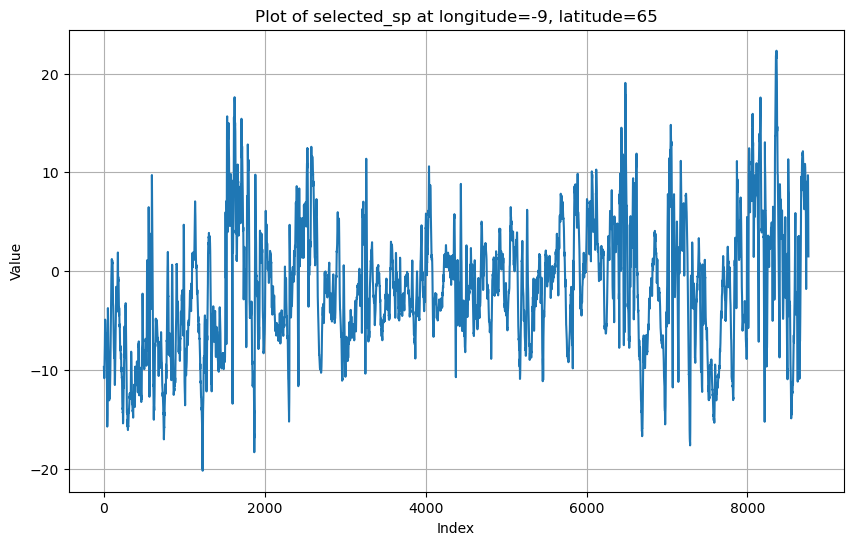

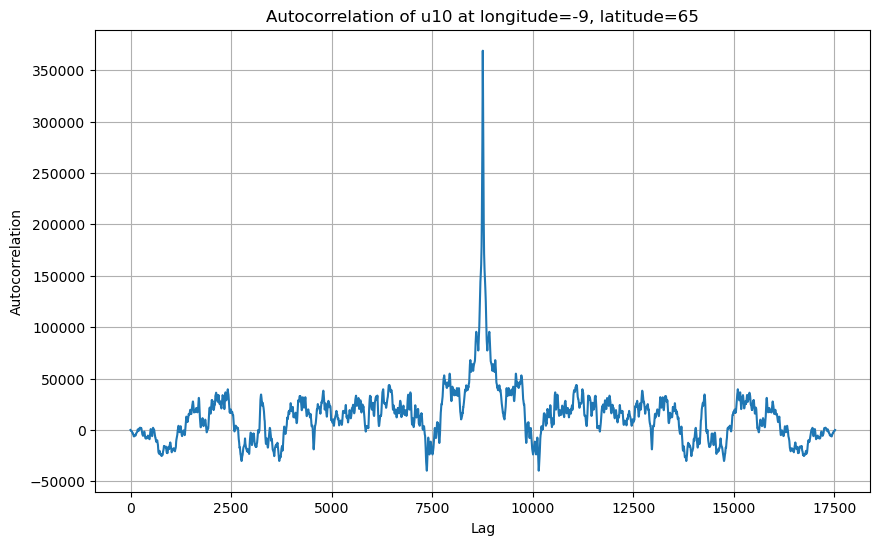

In [49]:
# Usage example
plot_autocorrelation(era5_2014, 'u10', lon=-9, lat=65)

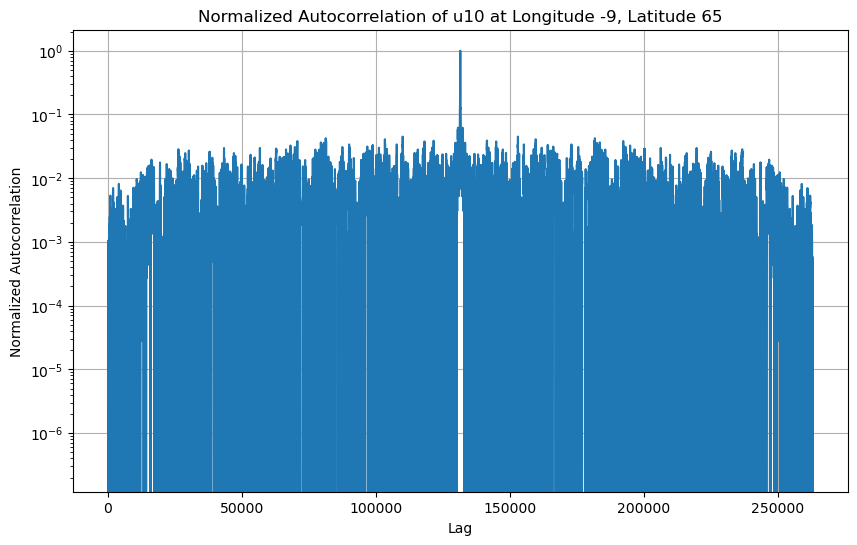

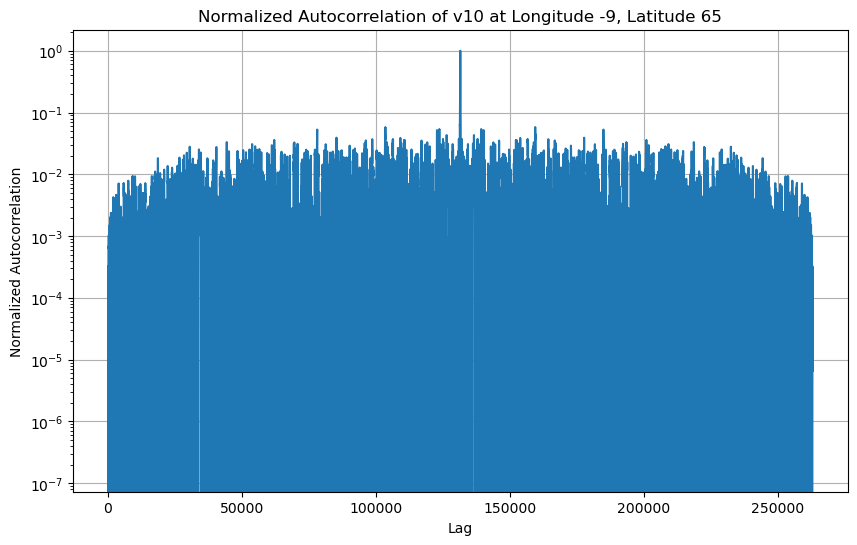

KeyboardInterrupt: 

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_autocorrelation(dataset, lon, lat):
    # Iterate over all variables in the dataset
    for variable in dataset.variables:
        # Skip non-data variables
        if variable not in dataset.data_vars:
            continue
        
        # Select the data at the given longitude and latitude
        selected_data = dataset[variable].sel(longitude=lon, latitude=lat, method='nearest')
        
        # Compute the autocorrelation using NumPy
        autocorr = np.correlate(selected_data, selected_data, mode='full')
        
        # Normalize the autocorrelation
        normalized_autocorr = autocorr / np.max(np.abs(autocorr))
        
        # Plot the normalized autocorrelation on a logarithmic scale
        plt.figure(figsize=(10, 6))
        plt.plot(normalized_autocorr)
        plt.title(f'Normalized Autocorrelation of {variable} at Longitude {lon}, Latitude {lat}')
        plt.xlabel('Lag')
        plt.ylabel('Normalized Autocorrelation')
        plt.grid(True)
        plt.yscale('log')  # Set logarithmic scale for y-axis
        plt.show()

# Usage example
plot_autocorrelation(merged_data, lon=-9, lat=65)

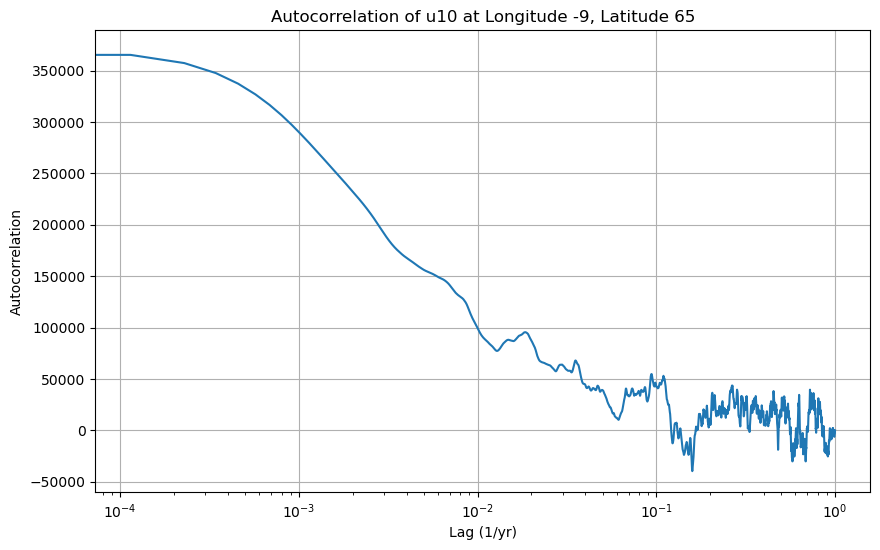

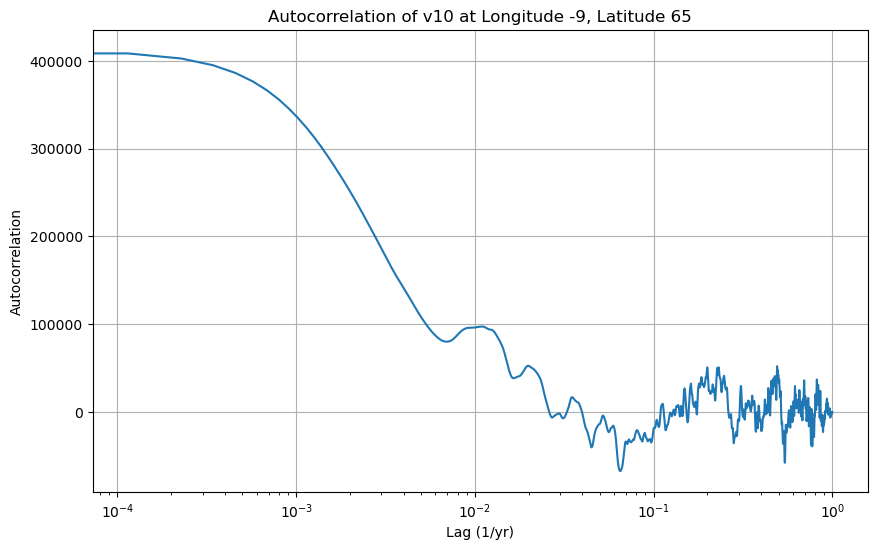

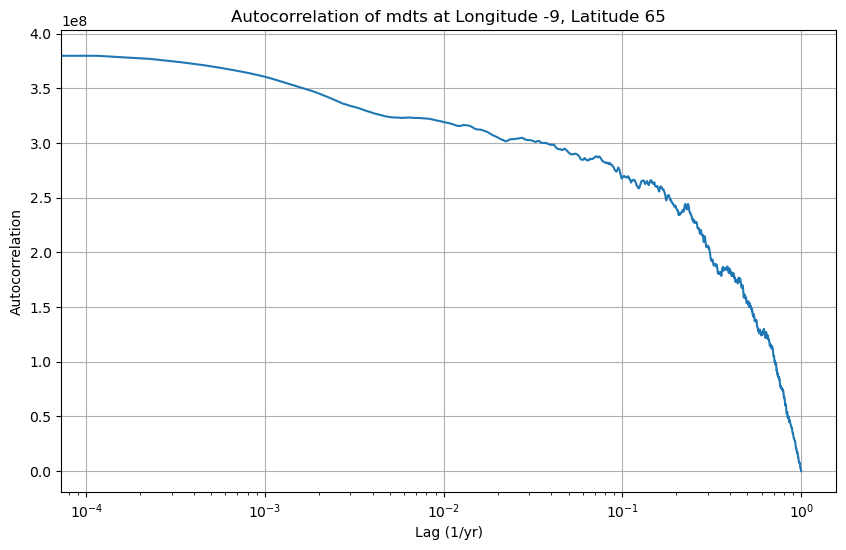

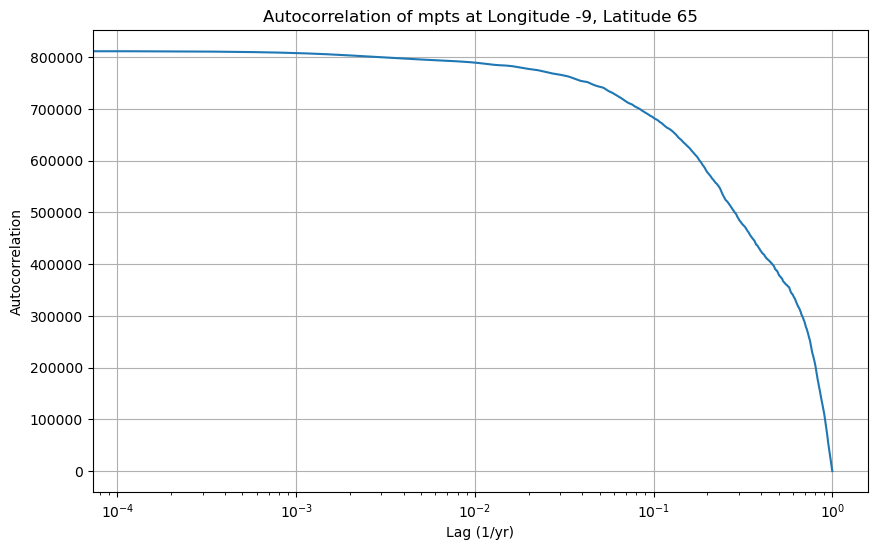

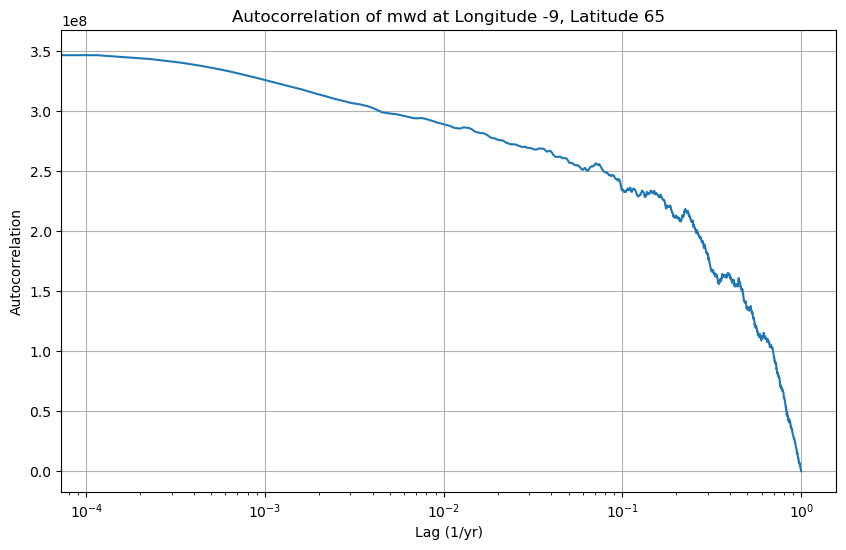

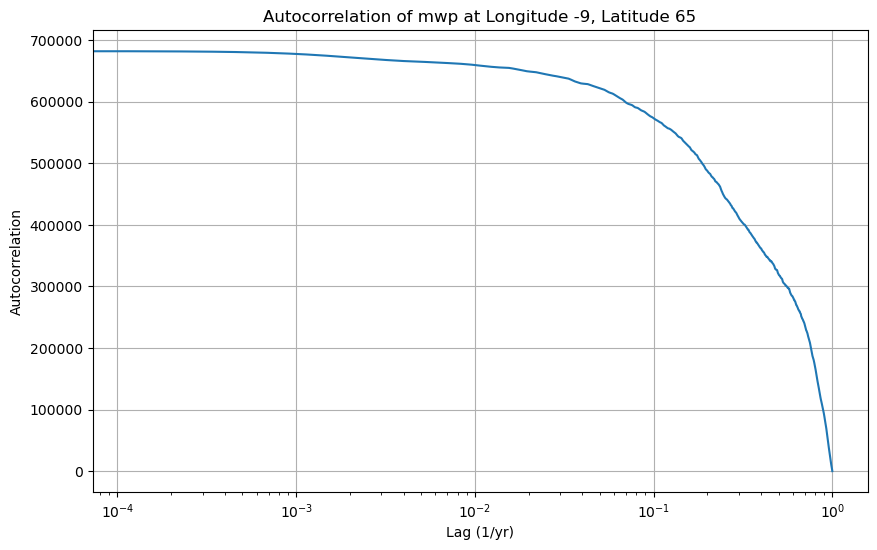

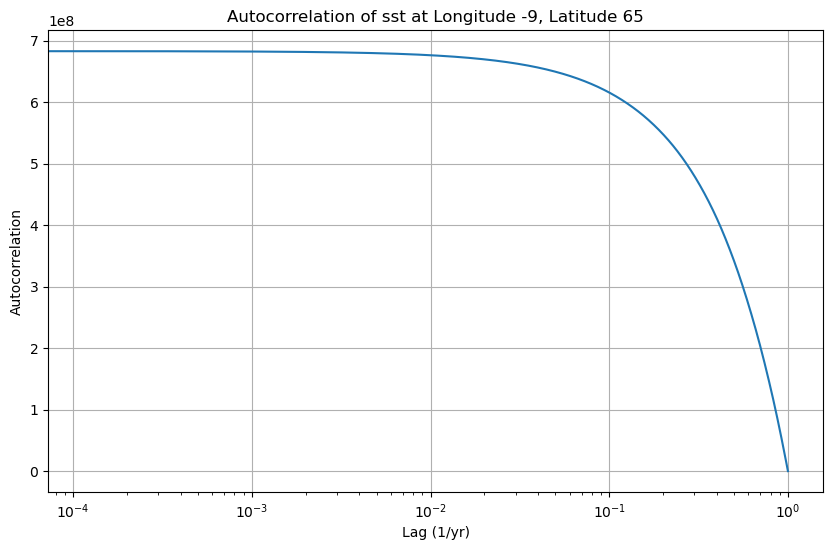

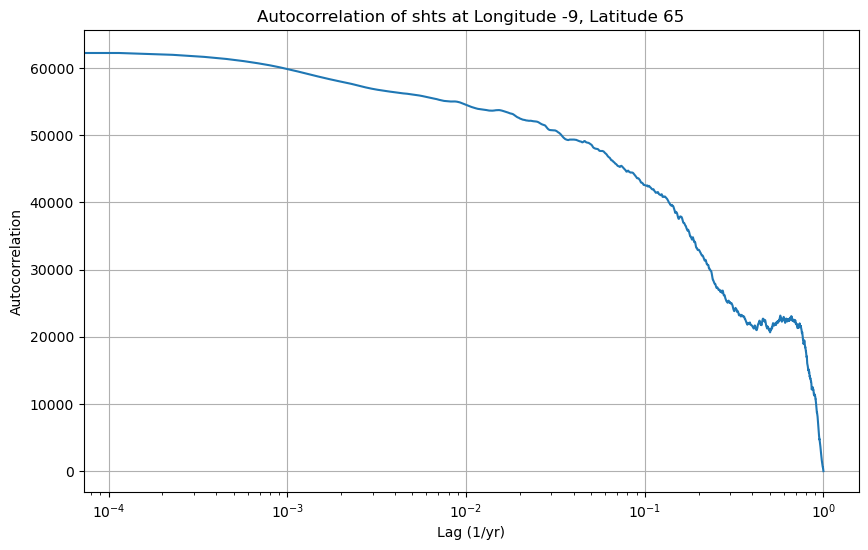

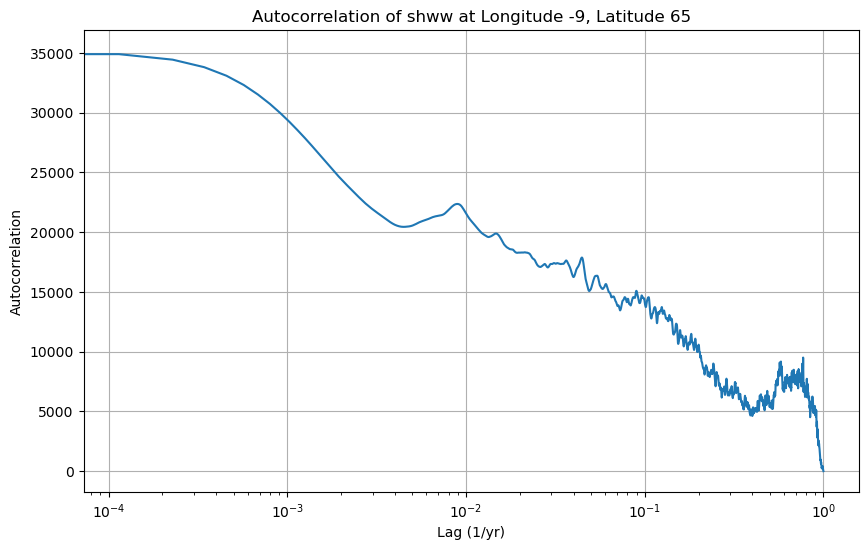

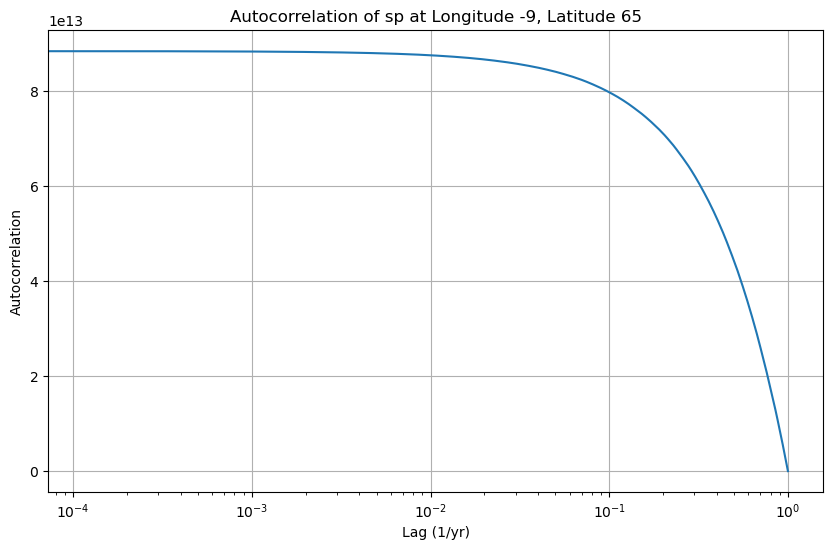

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def plot_autocorrelation(dataset, lon, lat):
    # Iterate over all variables in the dataset
    for variable in dataset.variables:
        # Skip non-data variables
        if variable not in dataset.data_vars:
            continue
        
        # Select the data at the given longitude and latitude
        selected_data = dataset[variable].sel(longitude=lon, latitude=lat, method='nearest')
        
        # Compute the autocorrelation using NumPy
        autocorr = np.correlate(selected_data, selected_data, mode='full')
        
        # Calculate the lag in years
        lag_years = np.arange(-len(selected_data) + 1, len(selected_data)) / (365 * 24)
        
        # Plot the autocorrelation
        plt.figure(figsize=(10, 6))
        plt.plot(lag_years, autocorr)
        plt.title(f'Autocorrelation of {variable} at Longitude {lon}, Latitude {lat}')
        plt.xlabel('Lag (1/yr)')
        plt.ylabel('Autocorrelation')
        plt.xscale('log')  # Set logarithmic scale for x-axis
        plt.grid(True)
        plt.show()

# Usage example
plot_autocorrelation(era5_2014, lon=-9, lat=65)


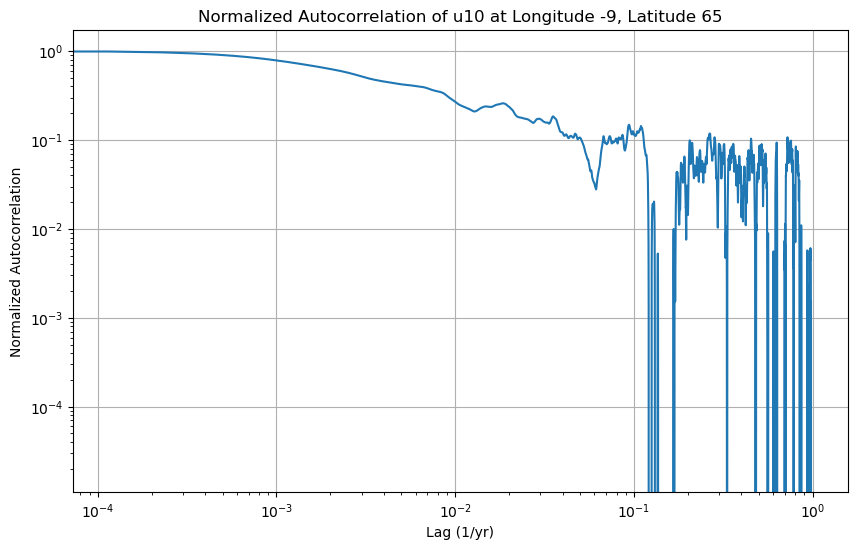

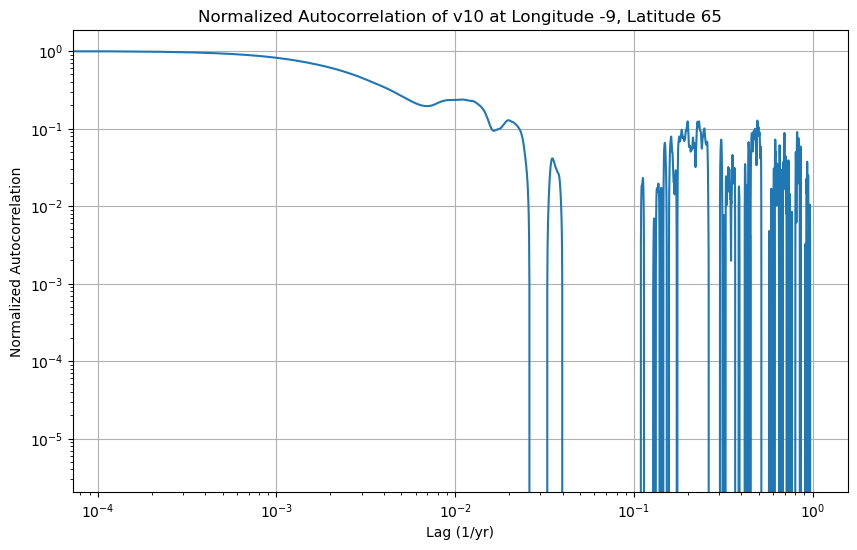

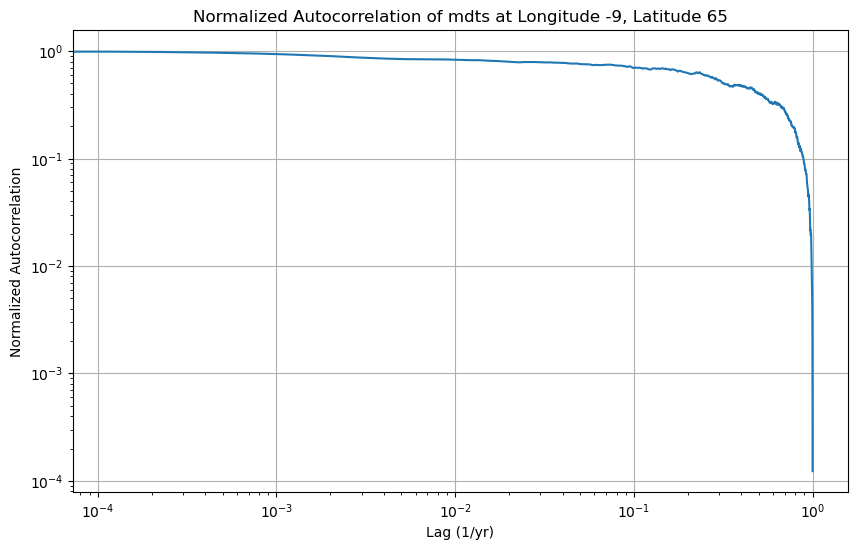

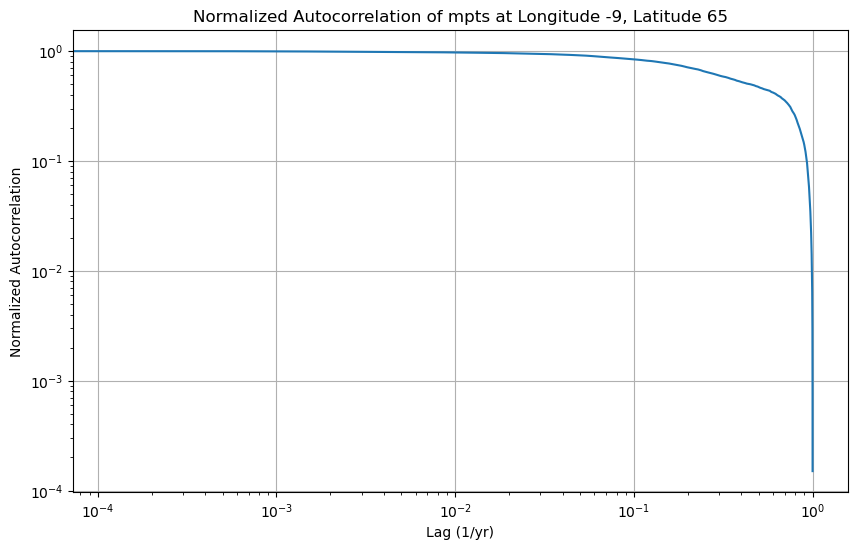

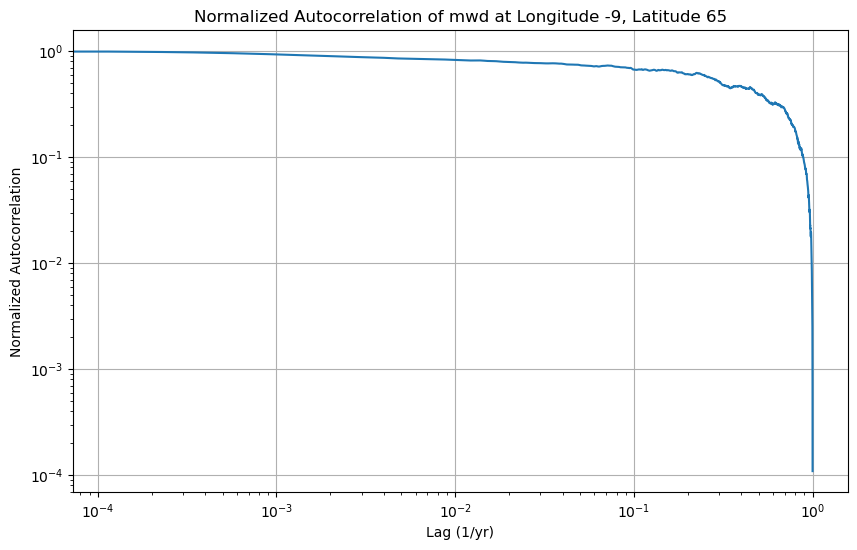

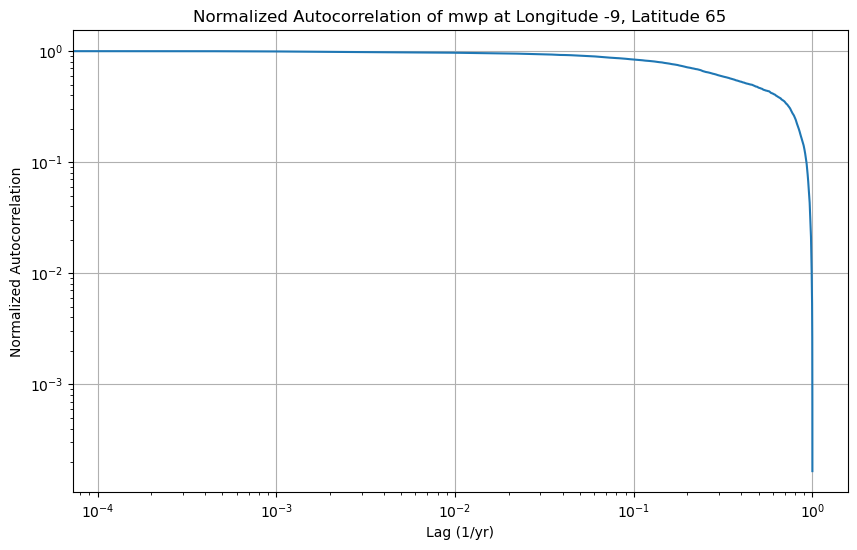

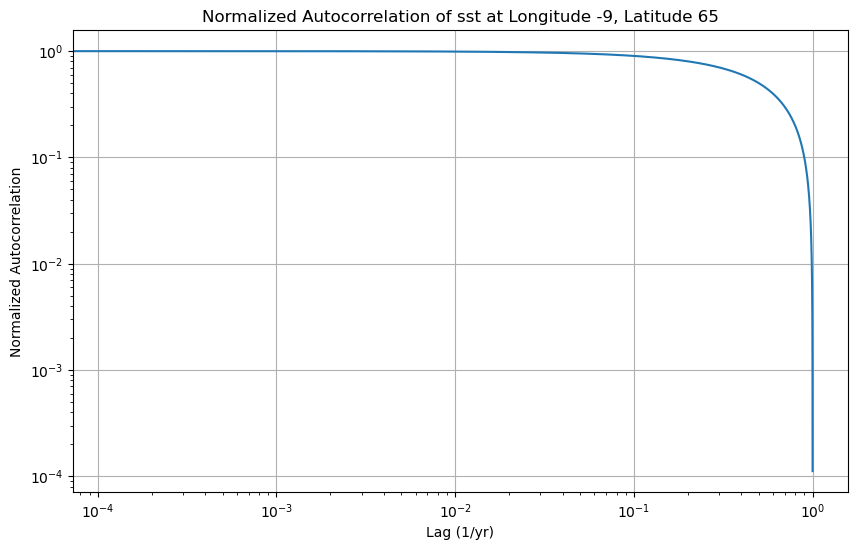

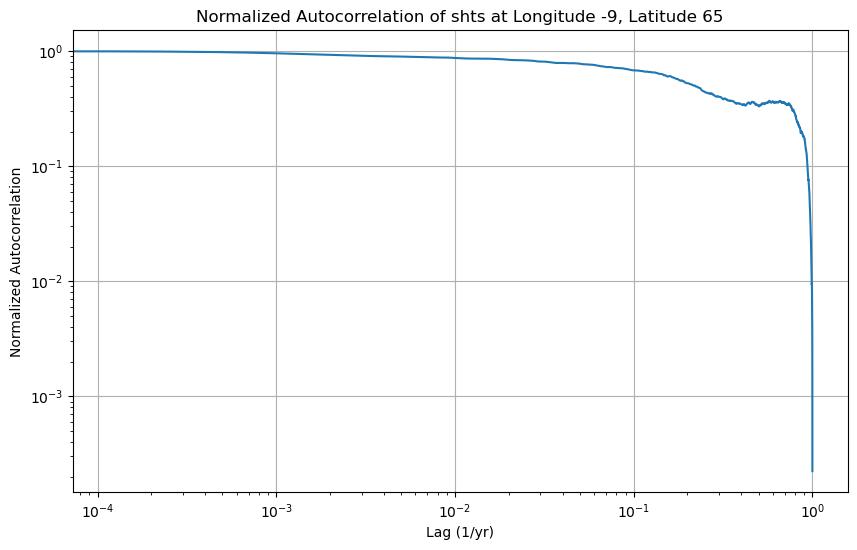

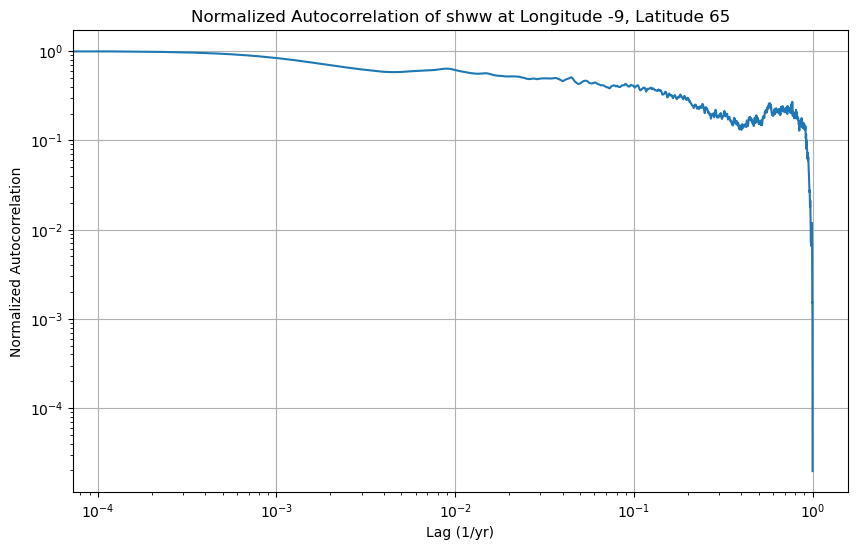

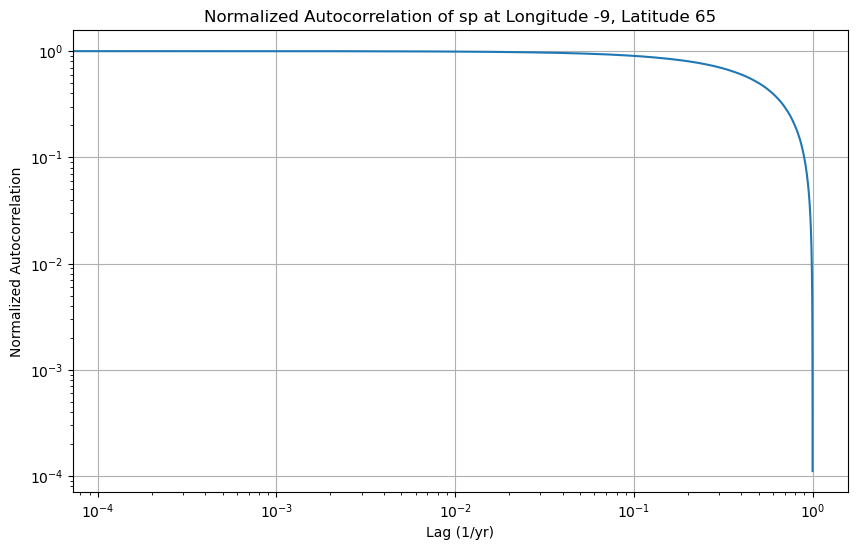

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plot_autocorrelation(dataset, lon, lat):
    # Iterate over all variables in the dataset
    for variable in dataset.variables:
        # Skip non-data variables
        if variable not in dataset.data_vars:
            continue
        
        # Select the data at the given longitude and latitude
        selected_data = dataset[variable].sel(longitude=lon, latitude=lat, method='nearest')
        
        # Compute the autocorrelation using NumPy
        autocorr = np.correlate(selected_data, selected_data, mode='full')
        
        # Normalize the autocorrelation
        normalized_autocorr = autocorr / np.max(np.abs(autocorr))
        
        # Calculate the lag in years
        lag_years = np.arange(-len(selected_data) + 1, len(selected_data)) / (365 * 24)
        
        # Plot the autocorrelation
        plt.figure(figsize=(10, 6))
        plt.plot(lag_years, normalized_autocorr)
        plt.title(f'Normalized Autocorrelation of {variable} at Longitude {lon}, Latitude {lat}')
        plt.xlabel('Lag (1/yr)')
        plt.ylabel('Normalized Autocorrelation')
        plt.xscale('log')  # Set logarithmic scale for x-axis
        plt.yscale('log')  # Set logarithmic scale for y-axis
        plt.grid(True)
        plt.show()

# Usage example
plot_autocorrelation(era5_2014, lon=-9, lat=65)


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d

def plot_autocorrelation_2d(dataset, lon, lat):
    # Iterate over all variables in the dataset
    for variable in dataset.variables:
        # Skip non-data variables
        if variable not in dataset.data_vars:
            continue
        
        # Select the data at the given longitude and latitude
        selected_data = dataset[variable].sel(longitude=lon, latitude=lat, method='nearest')
        
        # Compute the autocorrelation using NumPy
        autocorr = np.correlate(selected_data, selected_data, mode='full')
        
        # Normalize the autocorrelation
        normalized_autocorr = autocorr / np.max(np.abs(autocorr))
        
        # Calculate the lag in years
        lag_years = np.arange(-len(selected_data) + 1, len(selected_data)) / (365 * 24)
        
        # Create a meshgrid for lag values
        lag_x, lag_y = np.meshgrid(lag_years, lag_years)
        
        # Interpolate autocorrelation values to fill the entire grid
        f = interp2d(lag_years, lag_years, normalized_autocorr, kind='linear')
        interpolated_autocorr = f(lag_x[0], lag_y[:, 0])
        
        # Plot the 2D histogram of autocorrelation values
        plt.figure(figsize=(10, 6))
        plt.pcolormesh(lag_x, lag_y, interpolated_autocorr, cmap='viridis')
        plt.colorbar(label='Normalized Autocorrelation')
        plt.title(f'Autocorrelation 2D Plot of {variable} at Longitude {lon}, Latitude {lat}')
        plt.xlabel('Lag (1/yr)')
        plt.ylabel('Lag (1/yr)')
        plt.grid(True)
        plt.show()

# Usage example
plot_autocorrelation_2d(era5_2014, lon=-9, lat=65)


/var/folders/2b/rpgq1g5d5qz2nhbpj5s4jnrc0000gq/T/ipykernel_12265/4176902017.py:28: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f = interp2d(lag_years, lag_years, normalized_autocorr, kind='linear')
/Users/lb962/miniconda3/envs/ESL/lib/python3.12/site-packages/scipy/interpolate/_fitpack_impl.py:593: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=134,135 m=17519 fp=

: 

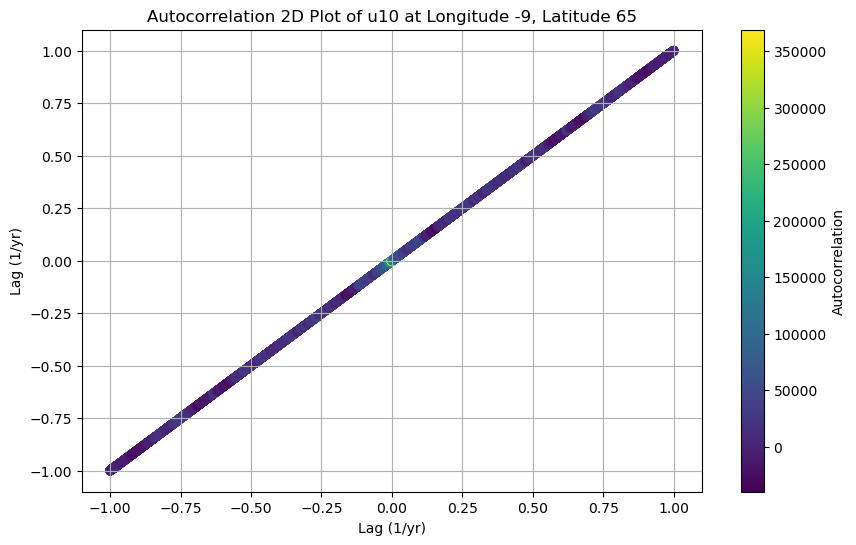

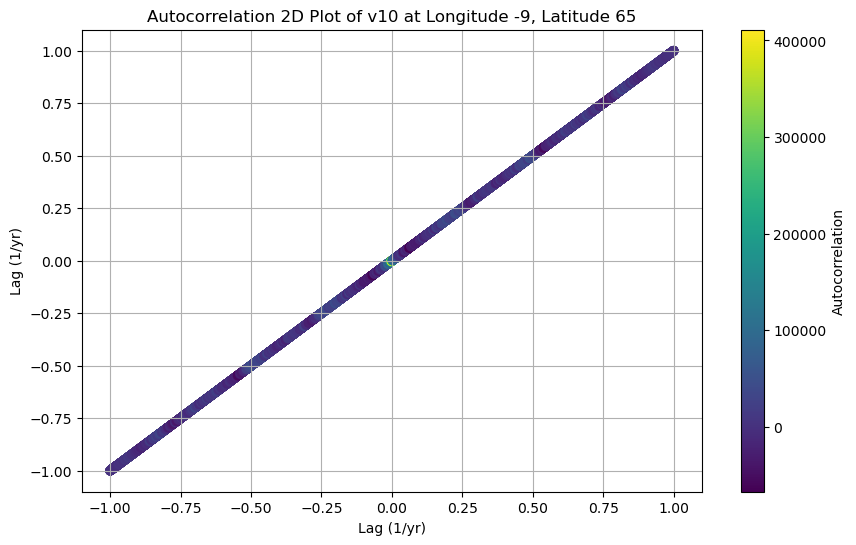

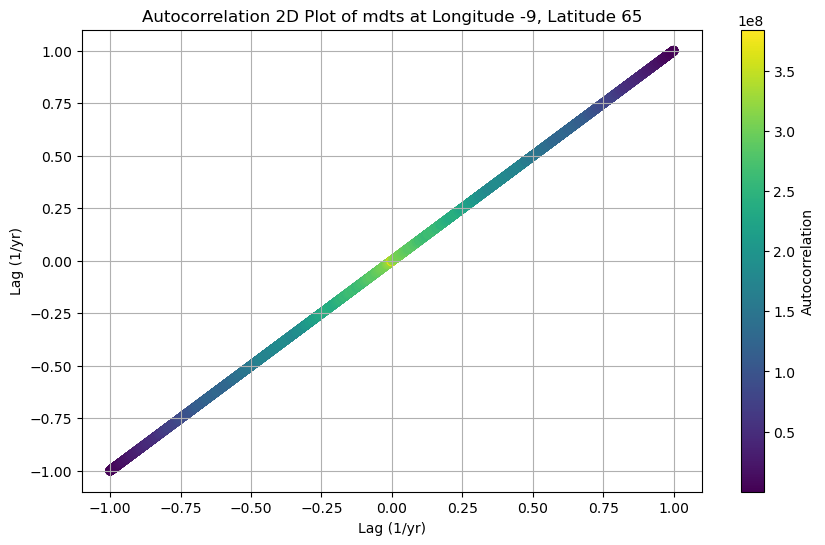

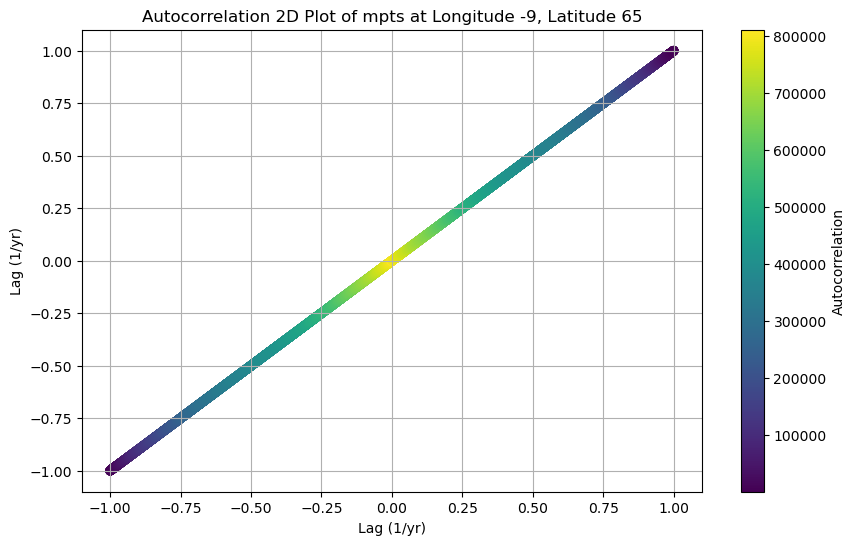

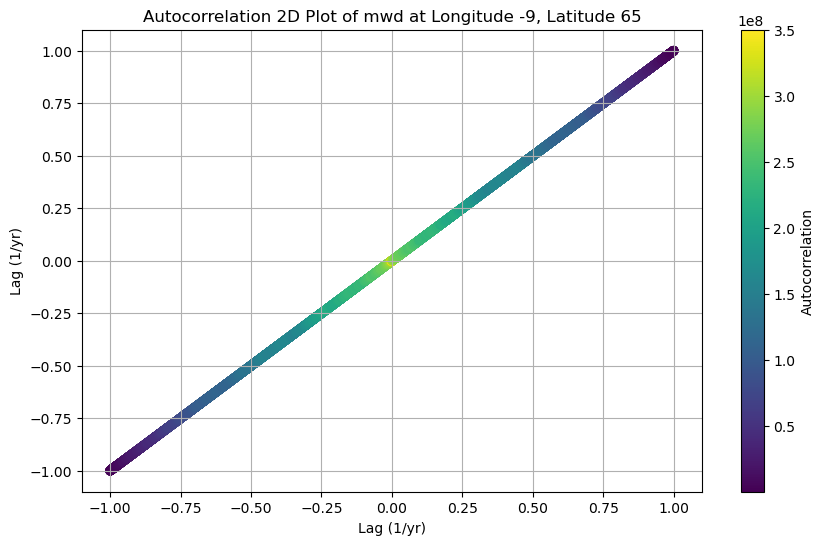

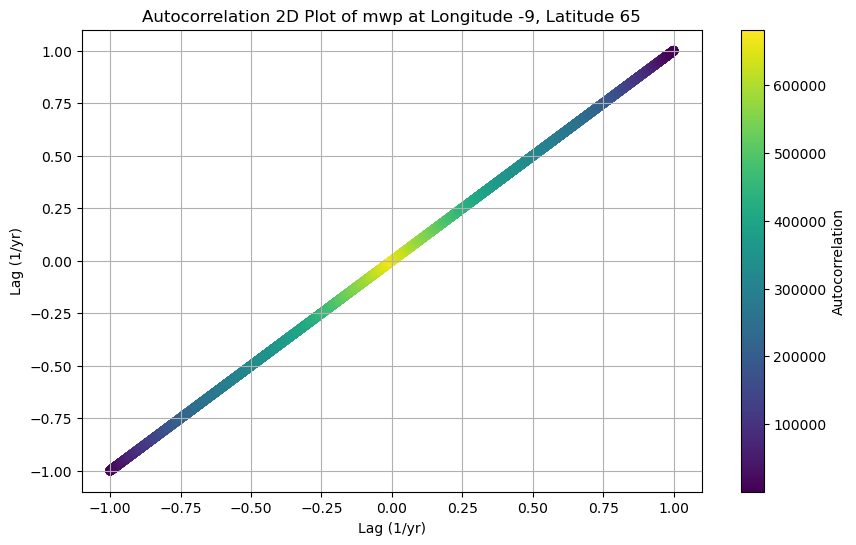

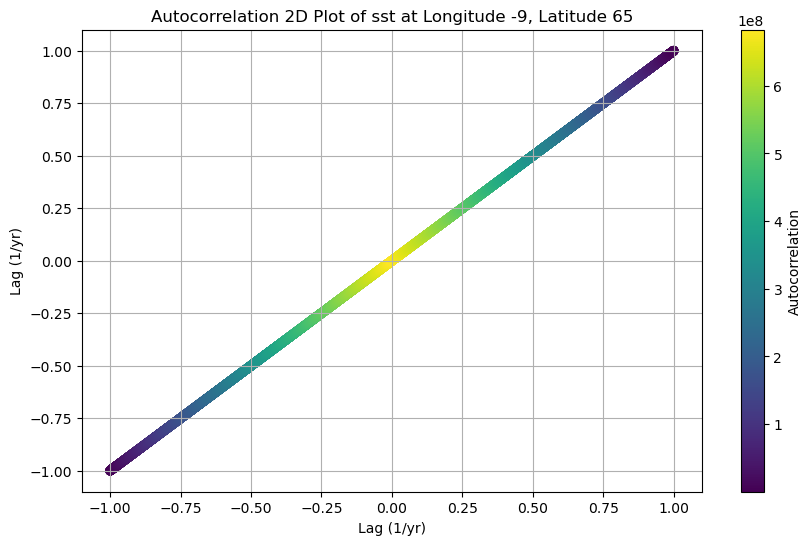

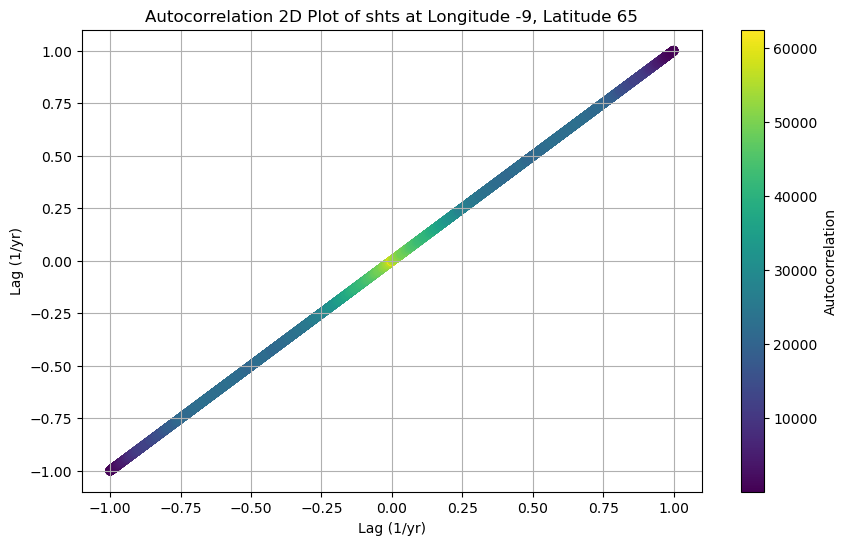

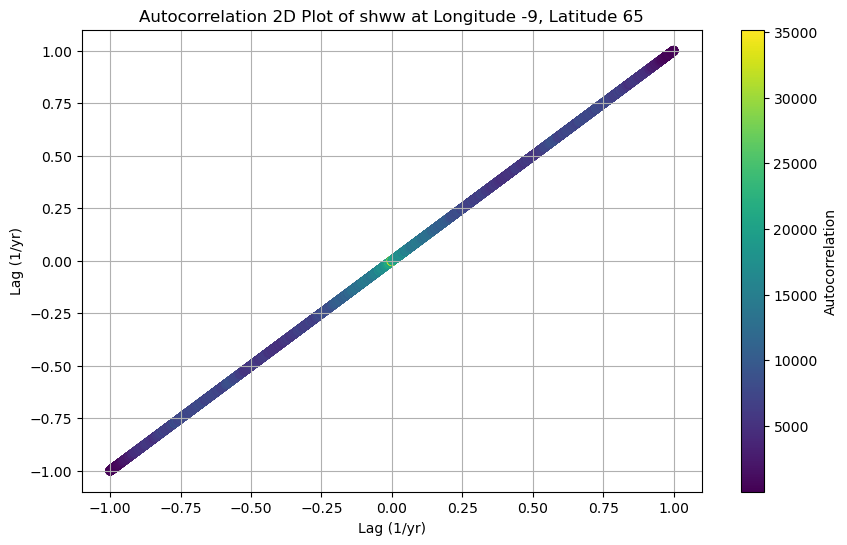

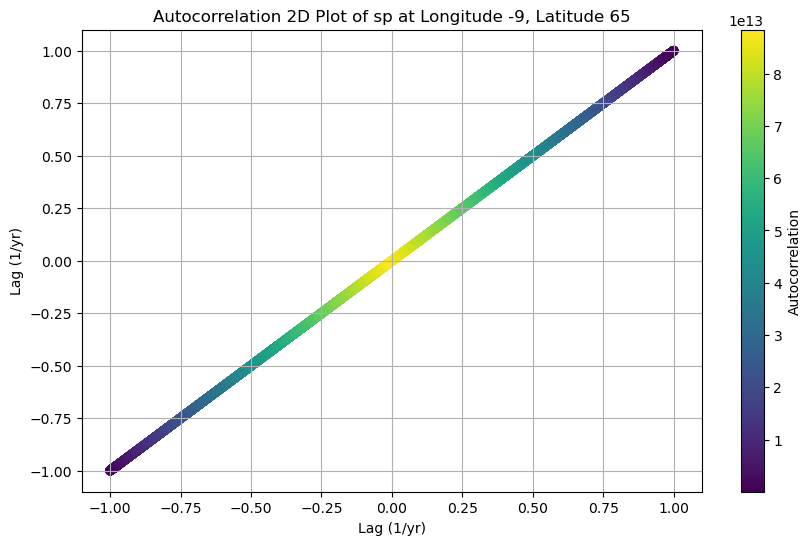

In [69]:
import numpy as np
import matplotlib.pyplot as plt

def plot_autocorrelation_2d(dataset, lon, lat):
    # Iterate over all variables in the dataset
    for variable in dataset.variables:
        # Skip non-data variables
        if variable not in dataset.data_vars:
            continue
        
        # Select the data at the given longitude and latitude
        selected_data = dataset[variable].sel(longitude=lon, latitude=lat, method='nearest')
        
        # Compute the autocorrelation using NumPy
        autocorr = np.correlate(selected_data, selected_data, mode='full')
        
        # Calculate the lag in years
        lag_years = np.arange(-len(selected_data) + 1, len(selected_data)) / (365 * 24)
        
        # Plot the 2D histogram of autocorrelation values
        plt.figure(figsize=(10, 6))
        plt.scatter(lag_years, lag_years, c=autocorr, cmap='viridis')
        plt.colorbar(label='Autocorrelation')
        plt.title(f'Autocorrelation 2D Plot of {variable} at Longitude {lon}, Latitude {lat}')
        plt.xlabel('Lag (1/yr)')
        plt.ylabel('Lag (1/yr)')
        plt.grid(True)
        plt.show()

# Usage example
plot_autocorrelation_2d(era5_2014, lon=-9, lat=65)


In [84]:
import numpy as np
import matplotlib.pyplot as plt

def plot_autocorrelation_2d(dataset, lon, lat):
    # Iterate over all variables in the dataset
    for variable in dataset.variables:
        # Skip non-data variables
        if variable not in dataset.data_vars:
            continue
        
        # Select the data at the given longitude and latitude
        selected_data = dataset[variable].sel(longitude=lon, latitude=lat, method='nearest')
        
        # Compute the autocorrelation using NumPy
        autocorr = np.correlate(selected_data, selected_data, mode='full')
        
        # Calculate the lag in years
        lag_years = np.arange(-len(selected_data) + 1, len(selected_data)) / (365 * 24)
        
        # Create meshgrid for lag values
        lag_x, lag_y = np.meshgrid(lag_years[:-1], lag_years[:-1])
        lag_years = np.linspace(-len(selected_data) + 1, len(selected_data) - 1, len(autocorr)) / (365 * 24)

        print("Length of autocorr:", len(autocorr))
        print("Length of lag_years - 1:", len(lag_years) - 1)

        # Reshape autocorrelation array
        autocorr_reshaped = autocorr[:len(lag_years)-1].reshape(len(lag_years) - 1, len(lag_years) - 1)
       
        # Plot the 2D histogram of autocorrelation values
        plt.figure(figsize=(10, 6))
        plt.pcolormesh(lag_x, lag_y, autocorr_reshaped, cmap='viridis')
        plt.colorbar(label='Autocorrelation')
        plt.title(f'Autocorrelation 2D Plot of {variable} at Longitude {lon}, Latitude {lat}')
        plt.xlabel('Lag (1/yr)')
        plt.ylabel('Lag (1/yr)')
        plt.grid(True)
        plt.show()

# Usage example
plot_autocorrelation_2d(era5_2014, lon=-9, lat=65)

: 

NameError: name 'lag_x' is not defined

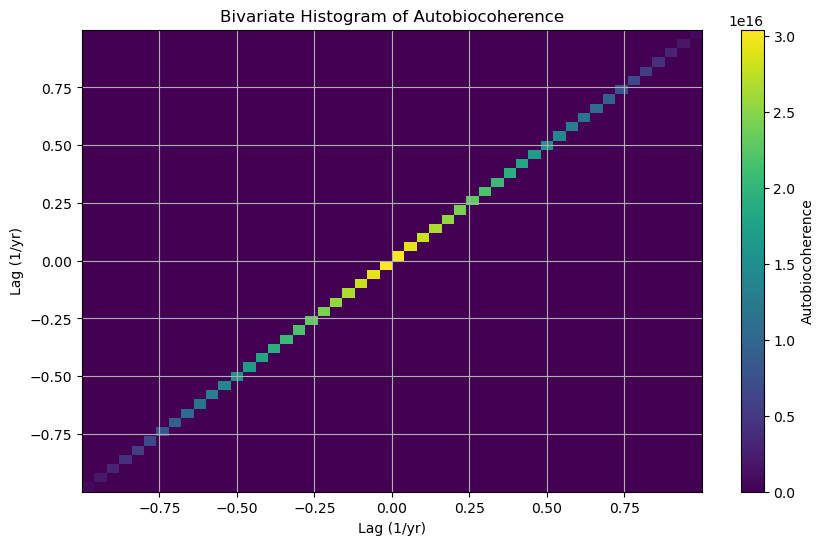

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def plot_autobiocoherence_bivariate(dataset, lon, lat):
    # Select the data at the given longitude and latitude
    selected_data = dataset['sp'].sel(longitude=lon, latitude=lat, method='nearest')
    
    # Compute the autobiocoherence using NumPy
    autobiocoherence = np.correlate(selected_data, selected_data, mode='full')
    
    # Calculate the lag in years
    lag_years = np.arange(-len(selected_data) + 1, len(selected_data)) / (365 * 24)
    
    # Plot the bivariate histogram of autobiocoherence values
    plt.figure(figsize=(10, 6))
    plt.hist2d(lag_years, lag_years, bins=50, weights=autobiocoherence, cmap='viridis')
    plt.title('Bivariate Histogram of Autobiocoherence')
    plt.xlabel('Lag (1/yr)')
    plt.ylabel('Lag (1/yr)')
    plt.colorbar(label='Autobiocoherence')
    plt.grid(True)
    plt.show()

# Usage example
plot_autobiocoherence_bivariate(era5_2014, lon=-9, lat=65)
